In [1]:
import sys
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
import matplotlib.pyplot as plt
from snudda.utils.load import SnuddaLoad

In [2]:
external = os.path.join("/media","jofrony","2TB","dardel","current_bgd2","population_unit", "complete_network", "supercomputer", "networks")

In [3]:
folder = "frequency"

In [8]:
parameters = {"start": 0.5, "end": 2.5}

In [4]:
e = Experiments()
e.add_experiment(name="p0125_p1",
                 color="black",
                 label="p=0.125",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p0125"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-44-09_p1.hdf5")
e.add_experiment(name="p0125_p1_p2",
                 color="black",
                 label="p=0.125",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p0125"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-44-12_p1_p2.hdf5")
e.add_experiment(name="p025_p1",
                 color="blue",
                 label="p=0.25",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p025"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-45-19_p1.hdf5")
e.add_experiment(name="p025_p1_p2",
                 color="blue",
                 label="p=0.25",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p025"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-45-26_p1_p2.hdf5")
e.add_experiment(name="p05_p1",
                 color="green",
                 label="p=0.5",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p05"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-46-27_p1.hdf5")
e.add_experiment(name="p05_p1_p2",
                 color="green",
                 label="p=0.5",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p05"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-46-40_p1_p2.hdf5")

In [5]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=False)

Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/complete_network/supercomputer/networks/pdc_network_2022-08-31-p0125/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-44-09_p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/complete_network/supercomputer/networks/pdc_network_2022-08-31-p0125/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-44-12_p1_p2.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/complete_network/supercomputer/networks/pdc_network_2022-08-31-p025/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-45-19_p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/

In [9]:
%%time
neuron_type = "dSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
frequency_analysis_dict_dspn = frequency_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids, parameters=parameters)


CPU times: user 32.7 s, sys: 3.72 s, total: 36.4 s
Wall time: 8min 56s


In [10]:
%%time
neuron_type = "iSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
frequency_analysis_dict_ispn = frequency_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids, parameters=parameters)


CPU times: user 1min 26s, sys: 10 s, total: 1min 36s
Wall time: 9min 31s


In [11]:
frequency_analysis_dict = {i : dict() for i in [*e.experiments.keys()]}

In [12]:
for v, k in frequency_analysis_dict_dspn.items():
    frequency_analysis_dict[v].update(k)

In [14]:
import pandas as pd
import seaborn as sns
d = {"size": list(), "response": list()}
tmps = dict()
for distance in ["0125","025","05"]:
    tmps.update({distance: list()})
    for ids in [k for k in frequency_analysis_dict[f"p{distance}_p1"]][::50]:
        d["size"].append(f"p{distance}")
        diff = frequency_analysis_dict[f"p{distance}_p1_p2"][ids] - frequency_analysis_dict[f"p{distance}_p1"][ids]
        tmps[distance].append(diff)
        d["response"].append(diff)
df = pd.DataFrame(data=d)

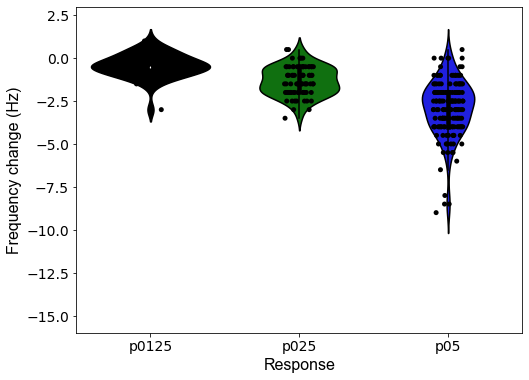

In [15]:
csfont = {"fontname": "Arial", 'fontsize': 16}
colors = {"p0125": "black",
         "p025": "green" ,
         "p05": "blue"}
plt.figure(figsize=(8, 6))
sns.violinplot(x="size", y="response", data=df,palette=colors)
sns.stripplot(x="size", y="response", data=df,
              color="black", edgecolor="gray")

plt.ylabel("Frequency change (Hz)", **csfont)
plt.xlabel("Response", **csfont)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylim((-16,3))
plt.savefig(os.path.join("violin_frequency","distance_inhibition_dSPN.svg"))

In [16]:
frequency_analysis_dict = {i : dict() for i in [*e.experiments.keys()]}

In [17]:
for v, k in frequency_analysis_dict_ispn.items():
    frequency_analysis_dict[v].update(k)

In [18]:
import pandas as pd
import seaborn as sns
d = {"size": list(), "response": list()}
tmps = dict()
for distance in ["0125","025","05"]:
    tmps.update({distance: list()})
    for ids in [k for k in frequency_analysis_dict[f"p{distance}_p1"]][::50]:
        d["size"].append(f"p{distance}")
        diff = frequency_analysis_dict[f"p{distance}_p1_p2"][ids] - frequency_analysis_dict[f"p{distance}_p1"][ids]
        tmps[distance].append(diff)
        d["response"].append(diff)
df = pd.DataFrame(data=d)

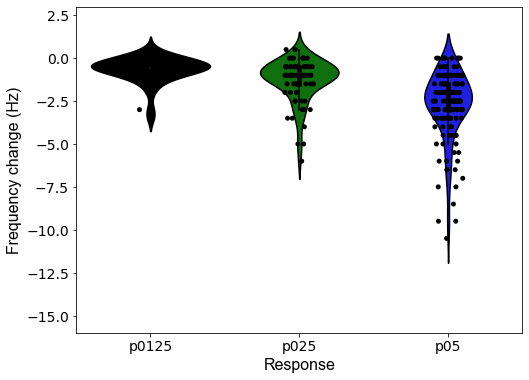

In [19]:
csfont = {"fontname": "Arial", 'fontsize': 16}
colors = {"p0125": "black",
         "p025": "green" ,
         "p05": "blue"}
plt.figure(figsize=(8, 6))
sns.violinplot(x="size", y="response", data=df,palette=colors)
sns.stripplot(x="size", y="response", data=df,
              color="black", edgecolor="gray")

plt.ylabel("Frequency change (Hz)", **csfont)
plt.xlabel("Response", **csfont)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylim((-16,3))
plt.savefig(os.path.join("violin_frequency","distance_inhibition_iSPN.svg"))